# Explore the steps used in implementation for the model training using Neural network on MNIST data set.

Training a neural network on the MNIST dataset involves several key steps. The MNIST dataset is a collection of 28x28 grayscale images of handwritten digits (0-9), and it is often used as a benchmark for testing machine learning models. Here are the general steps for implementing and training a neural network on the MNIST dataset:

Import Libraries:
Start by importing the necessary libraries, such as TensorFlow or PyTorch for building and training neural networks.

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist


Load and Preprocess Data:
Load the MNIST dataset, which is usually available in popular deep learning frameworks.

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


Grayimage 1 and gray 0

In [4]:
#Normalize pixel values to be between 0 and 1.
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0


In [5]:
#Reshape the images into the format expected by the neural network.
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))


In [6]:
#Encode the labels using one-hot encoding.
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


Build the Neural Network Model:
Design the architecture of the neural network. For MNIST, a simple convolutional neural network (CNN) is often used.

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [8]:
#Compile the Model: Specify the loss function, optimizer, and metrics for model compilation.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
#Train the Model: Train the model using the training data.
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
750/750 [==============================] - 49s 63ms/step - loss: 0.2124 - accuracy: 0.9336 - val_loss: 0.0650 - val_accuracy: 0.9812
Epoch 2/10
750/750 [==============================] - 44s 58ms/step - loss: 0.0560 - accuracy: 0.9825 - val_loss: 0.0570 - val_accuracy: 0.9833
Epoch 3/10
750/750 [==============================] - 47s 62ms/step - loss: 0.0385 - accuracy: 0.9879 - val_loss: 0.0549 - val_accuracy: 0.9835
Epoch 4/10
750/750 [==============================] - 46s 62ms/step - loss: 0.0295 - accuracy: 0.9905 - val_loss: 0.0476 - val_accuracy: 0.9867
Epoch 5/10
750/750 [==============================] - 44s 58ms/step - loss: 0.0244 - accuracy: 0.9921 - val_loss: 0.0439 - val_accuracy: 0.9869
Epoch 6/10
750/750 [==============================] - 49s 66ms/step - loss: 0.0189 - accuracy: 0.9935 - val_loss: 0.0401 - val_accuracy: 0.9898
Epoch 7/10
750/750 [==============================] - 46s 61ms/step - loss: 0.0159 - accuracy: 0.9953 - val_loss: 0.0510 - val_accuracy:

In [10]:
#Evaluate the Model: Evaluate the trained model on the test data.
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


313/313 [==============================] - 3s 10ms/step - loss: 0.0342 - accuracy: 0.9898
Test accuracy: 0.989799976348877


In [12]:
#Make Predictions: Use the trained model to make predictions on new data.
predictions = model.predict(test_images)


313/313 [==============================] - 3s 11ms/step


313/313 [==============================] - 3s 9ms/step
Actual Label: 7, Predicted Label: 7
Actual Label: 2, Predicted Label: 2
Actual Label: 1, Predicted Label: 1
Actual Label: 0, Predicted Label: 0
Actual Label: 4, Predicted Label: 4


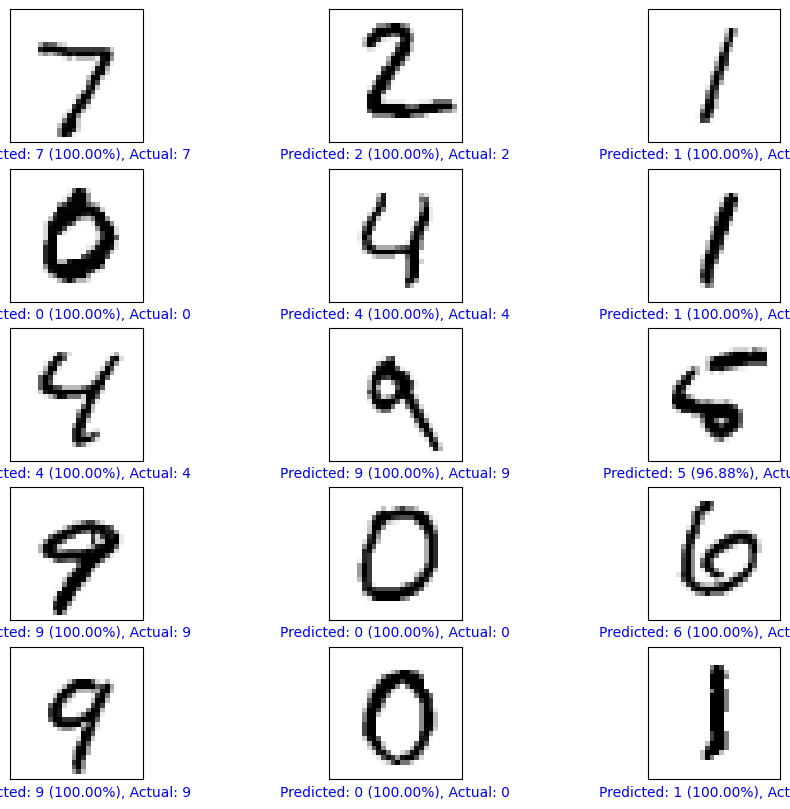

In [13]:
# Assuming you have already trained and compiled the model as mentioned in the previous response

# Make predictions on the test set
predictions = model.predict(test_images)

# Get the index of the class with the highest probability for each prediction
predicted_labels = predictions.argmax(axis=1)

# Display the first few predictions
for i in range(5):
    print(f"Actual Label: {test_labels[i].argmax()}, Predicted Label: {predicted_labels[i]}")

# Optionally, you can visualize the images and their predictions
import matplotlib.pyplot as plt

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i].argmax(), img[i].reshape(28, 28)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = predictions_array.argmax()
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"Predicted: {predicted_label} ({100 * tf.reduce_max(predictions_array):.2f}%), Actual: {true_label}", color=color)

# Visualize the predictions
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
plt.show()
